In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv('/Users/peggy/Downloads/House_Data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
#Check missing data
df.isnull().any().any()

False

In [4]:
#Check data type of each variable
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.date = pd.to_datetime(df.date) #Convert "date" column to datetime format
df.zipcode = df.zipcode.apply(str)

print(df.date.dtype)
print(df.zipcode.dtype)

datetime64[ns]
object


### Distribution of Housing Prices in King County

- Look into the distribution of housing prices using distribution plot and Empirical Cumulative Distribution Function (ECDF).
- The distribution of house prices are deviated from normal distribution and are skewed to the right.
- From ECDF plot, we can see that there are 3 houses with prices over $6M, which deviate from normal price distribution.

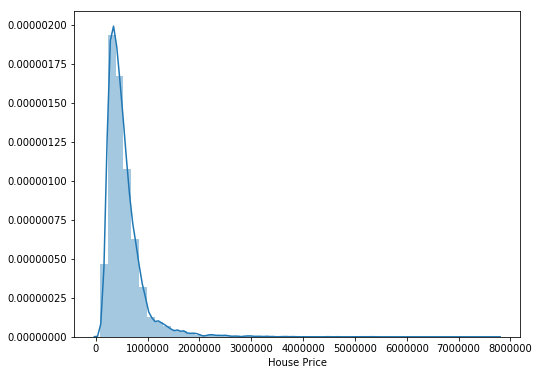

In [6]:
#Distribution plot
import seaborn as sns

fig = plt.figure(figsize = (8,6))
ax = sns.distplot(df.price)
ax.set(xlabel = 'House Price')
plt.show()


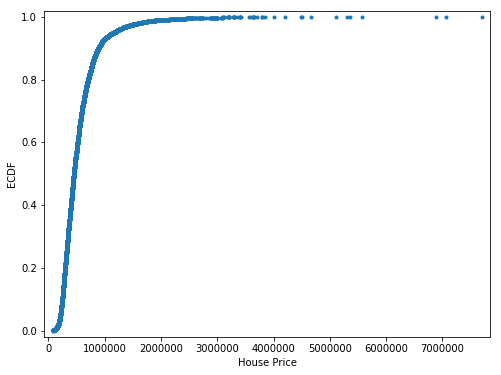

(array([   75000.,    78000.,    80000., ...,  6885000.,  7062500.,
         7700000.]),
 array([  4.62684495e-05,   9.25368991e-05,   1.38805349e-04, ...,
          9.99907463e-01,   9.99953732e-01,   1.00000000e+00]))

In [7]:
#ECDF 
historical_price = df[['price']]

def ecdf(data):
    n = len(data)
    x = np.sort(data.iloc[:,0])
    y = np.arange(1, n+1) / n
    _ = plt.figure(figsize = (8,6))
    _ = plt.plot(x, y, marker = '.', linestyle = 'none')
    _ = plt.xlabel('House Price')
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()
    return x, y

ecdf(historical_price)


### Explore Independent Variables

#### Zipcode & Housing Price

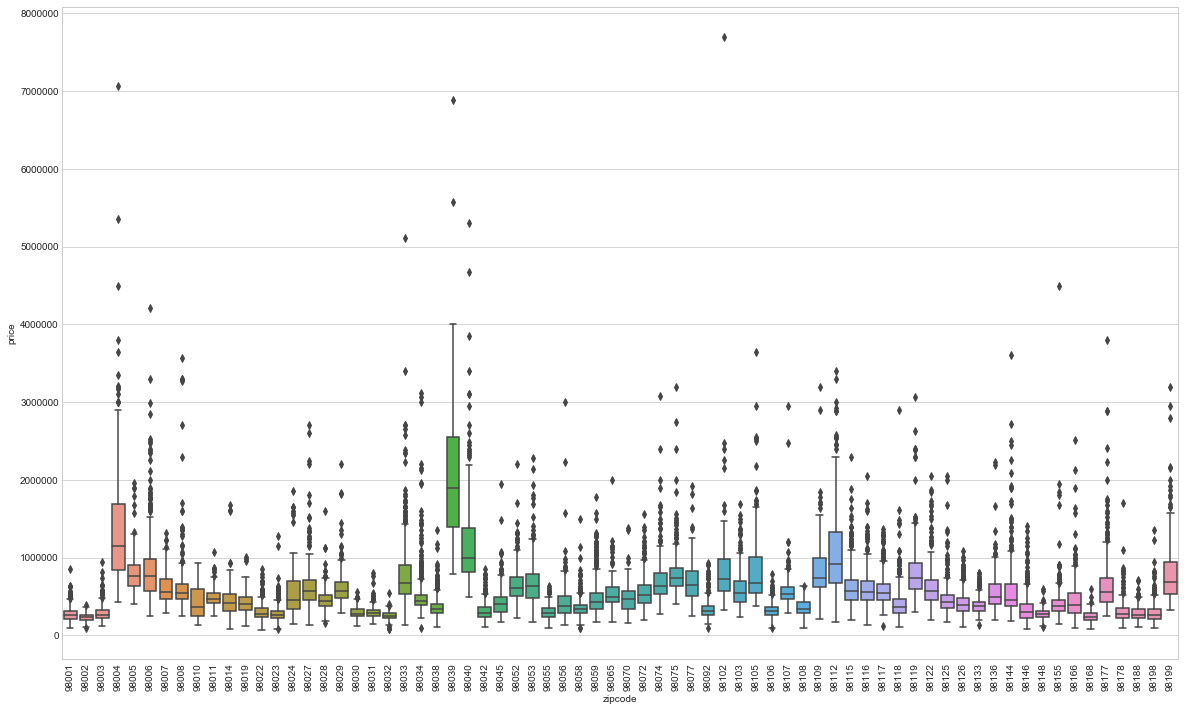

In [8]:
# Boxplot - Housing price
zipcodePrice = df[['zipcode', 'price']]

sns.set_style('whitegrid')
plt.figure(figsize = (20,12))
sns.boxplot(x = 'zipcode', y = 'price', data = zipcodePrice)
plt.xticks(rotation = 90)
plt.show()


In [9]:
#Median house prices based on zip code
zipcodePriceMedian = zipcodePrice.groupby(['zipcode'], as_index = False).median().rename(columns = {'price': 'median_price'})
zipcodePriceMedian = zipcodePriceMedian.sort_values(by = ['median_price'], ascending = False)

zipcodePriceMedian.head()

,zipcode,median_price
24,98039,1892500.0
3,98004,1150000.0
25,98040,993750.0
48,98112,915000.0
4,98005,765475.0


According to median house prices based on zip code, we can know that median house prices are high in zip code 98039, 98004, 98040, 98112 and 98005.

#### Do areas with higher house prices also have higher income?

- Added King County's median household income in the past 12 months to see if areas with higher house prices also have higher income.

- Data source: https://censusreporter.org/data/table/?table=B19013&geo_ids=05000US53033,860|05000US53033&primary_geo_id=05000US53033

In [10]:
zipcodeList = df.zipcode.unique().tolist()

# Median income 
incomeDF = pd.read_csv('/Users/peggy/Downloads/kingCountyIncome.csv').iloc[1:]
incomeDF = incomeDF[['name', 'B19013001']].rename(columns = {'name': 'zipcode', 'B19013001': 'median_income'})
incomeMedian = incomeDF[incomeDF['zipcode'].isin(zipcodeList)].reset_index(drop = True) #Selecting assigned zip codes 

incomeMedian = incomeMedian.sort_values(by = ['median_income'], ascending = False)
incomeMedian.head()


,zipcode,median_income
24,98039,182604
38,98075,159000
37,98074,156147
39,98077,132334
25,98040,129348


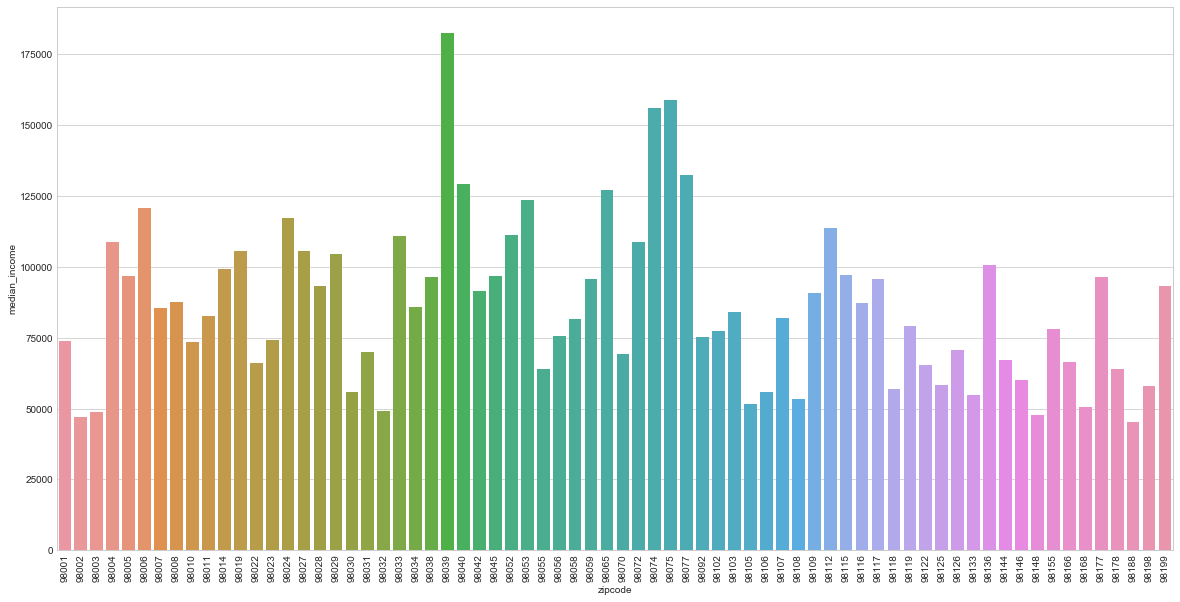

In [11]:
#Barplot - Median income

sns.set_style('whitegrid')
plt.figure(figsize = (20,10))
medianIncome = sns.barplot(x = 'zipcode', y = 'median_income', data = incomeMedian)
plt.xticks(rotation = 90)
plt.show()


The graphs above shows that most of the areas with higher house prices seems to have higher income, but we need to do a simple linear regression to see if the house price and income are statistical significant and the correlation coefficient between house price and income.

#### Linear Regression(OLS) - House prices vs Median Income

In [12]:
houseIncomeMedian = pd.concat([zipcodePriceMedian, incomeMedian], axis = 1) #Concatenate two dataframes
houseIncomeMedian = houseIncomeMedian.loc[:,~houseIncomeMedian.columns.duplicated()] #Remove duplicate columns

houseIncomeMedian.head()

,zipcode,median_price,median_income
0,98001,260000.0,73782
1,98002,235000.0,47184
2,98003,267475.0,48724
3,98004,1150000.0,108905
4,98005,765475.0,96767


In [13]:
from statsmodels.formula.api import ols
#Linear Regression - Ordinary Least Squares
#Take log of median house price and median income since both are not normally distributed
m = ols('np.log(median_price) ~ np.log(median_income)', houseIncomeMedian).fit()
print(m.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(median_price)   R-squared:                       0.542
Model:                              OLS   Adj. R-squared:                  0.535
Method:                   Least Squares   F-statistic:                     80.39
Date:                  Fri, 12 Jan 2018   Prob (F-statistic):           3.89e-13
Time:                          22:14:44   Log-Likelihood:                -10.606
No. Observations:                    70   AIC:                             25.21
Df Residuals:                        68   BIC:                             29.71
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

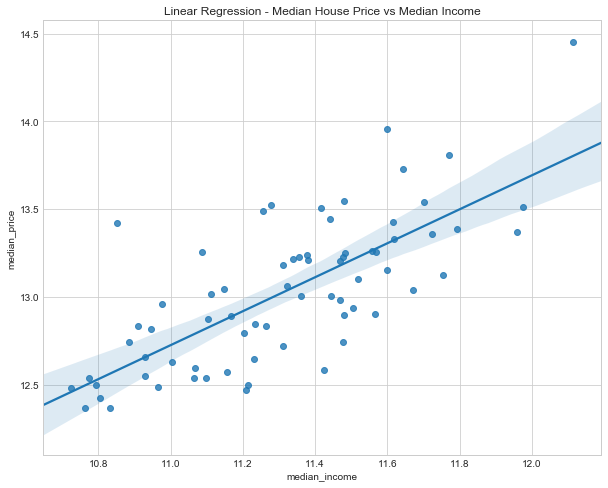

In [22]:
x, y = np.log(houseIncomeMedian.median_income), np.log(houseIncomeMedian.median_price)
plt.figure(figsize = (10,8))
plt.title('Linear Regression - Median House Price vs Median Income')
sns.regplot(x = x, y = y, data = houseIncomeMedian)
plt.show()

- From OLS regression results, the house price and income are statistical significant and the coefficient between house price and income is 0.967.
- From the regression plot, we can see that median house price and median income are positively correlated.

#### Where are houses located in? 
- Create a map of city neighborhoods using Python Basemap. 
- Each marker presents location and house price, and the bar at the right is price range.

/Users/peggy/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


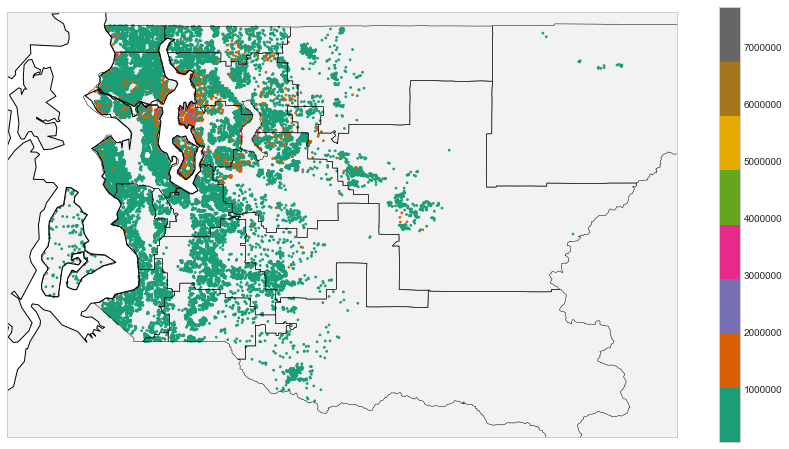

In [23]:
from mpl_toolkits.basemap import Basemap
#%matplotlib inline
#import matplotlib.pyplot as plt
#import mpld3

#mpld3.enable_notebook()

fig2 = plt.figure(figsize = (15,8))
m = Basemap(projection = 'mill',
            llcrnrlat = 47.1, llcrnrlon = -122.6, 
            urcrnrlat = 47.8, urcrnrlon = -121.2, resolution = 'h')

m.drawcoastlines()
m.drawcountries(linewidth = 2)
m.drawstates(color = 'b')
m.fillcontinents(color = '#f2f2f2', lake_color = 'aqua', zorder = 1)
m.readshapefile('/Users/peggy/Downloads/School_Districts_in_King_County__schdst_area/School_Districts_in_King_County__schdst_area', 'zipcode', drawbounds = True)
                 
ax = fig2.add_subplot(111)
x, y = m(np.array(df['long']), np.array(df['lat']))
scatter1 = ax.scatter(x, y, s = 3, 
                      c = np.array(df['price']),
                      marker = 'o', zorder = 1.5, 
                      cmap = plt.cm.Dark2)
plt.colorbar(scatter1)
plt.show()


### Correlation Heatmap 
Use heatmap to see the correlation between each attribute.

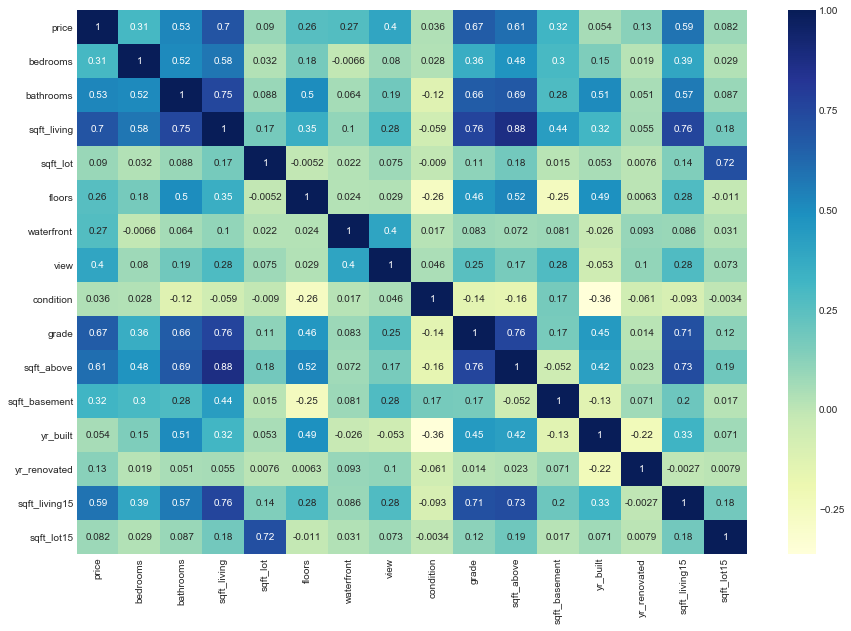

In [27]:
#Correlation

corrmap = df.drop(['id', 'date', 'zipcode', 'long', 'lat'], axis = 1).corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmap, cmap="YlGnBu", annot = True)
plt.show()


- The correlation heatmap tells us that 'sqft_living' seems to have high correlation with other variables. We need to confirm in order to avoid multicollinearity. 
- To avoid multicollinearity, use Variance Inflation Factor (VIF) to identify multicollinearity independent variables.



#### VIF(Variance Inflation Factor) 

In [48]:
def vif_check(data, dependent_var):
    x_vars = data.drop([dependent_var],axis = 1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = ols('y~x', data = x_vars).fit().rsquared
        vif = round(1/(1-rsq), 2)
        print(xvar_names[i], vif)

vifDF = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']]     
vif_check(vifDF, 'price')


bedrooms 1.57
bathrooms 2.85
sqft_lot 2.09
sqft_living 7.37
floors 1.8
sqft_above 6.09
sqft_living15 2.5
sqft_lot15 2.11


Usually we drop variables that have VIF > 5, and the VIF result above shows that 'sqft_living' and 'sqft_above' have VIF > 5, but we drop 'sqft_living' first and see if 'sqft_above' get better VIF result after removing 'sqft_living'.

In [50]:
vifDF = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']]     
vif_check(vifDF, 'price')


bedrooms 1.48
bathrooms 2.3
sqft_lot 2.08
floors 1.6
sqft_above 3.44
sqft_living15 2.31
sqft_lot15 2.11


After dropping 'sqft_living' variable, all variables are now have VIF < 5, meaning we avoid multicollinearity between variables.

### Categorical Features

#### Grade & Price
- From correlation heatmap, we can only know price has positive correlation with grades and grade has range from 1 to 13.
- With boxplot, now we can know that houses with higher grade have higher prices, with 13 the highest grade and 1 the lowest.

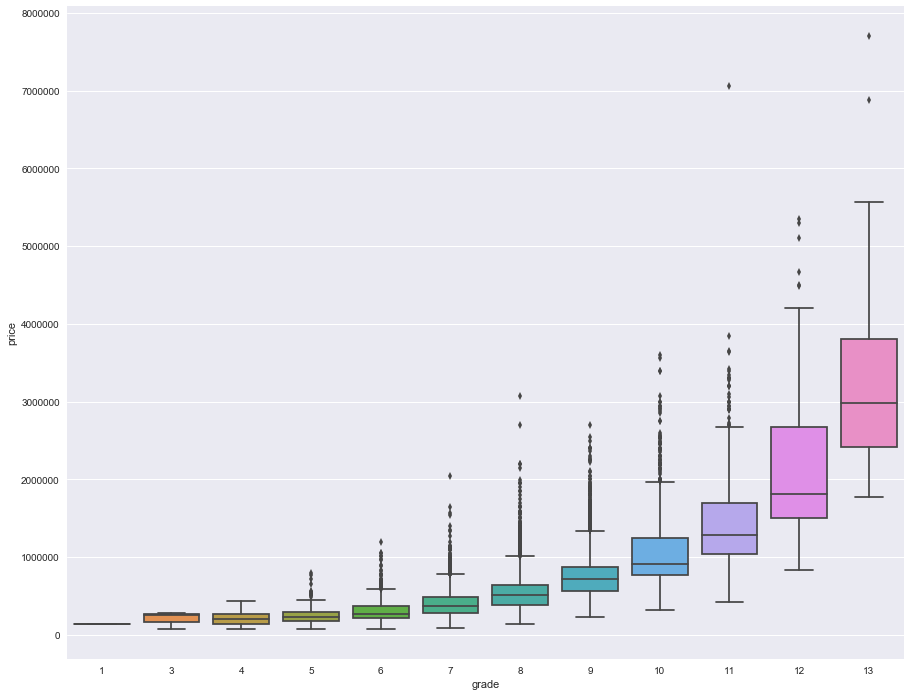

In [16]:
#Box plot grade & price
fig = plt.figure(figsize = (15, 12))
grade_price = pd.concat([df['price'], df['grade']], axis = 1)
_ = sns.boxplot(x = 'grade', y = 'price', data = grade_price)
plt.show()


#### Bathroom & Price
- Based on boxplot, houses with more bathrooms have higher value and there is 1 house with 7.5 bathroom and another 1 house with 7.75 bathroom.
- From the histogram, most of the houses have 2.5 bathrooms and there are 10 houses with 0 bathroom.

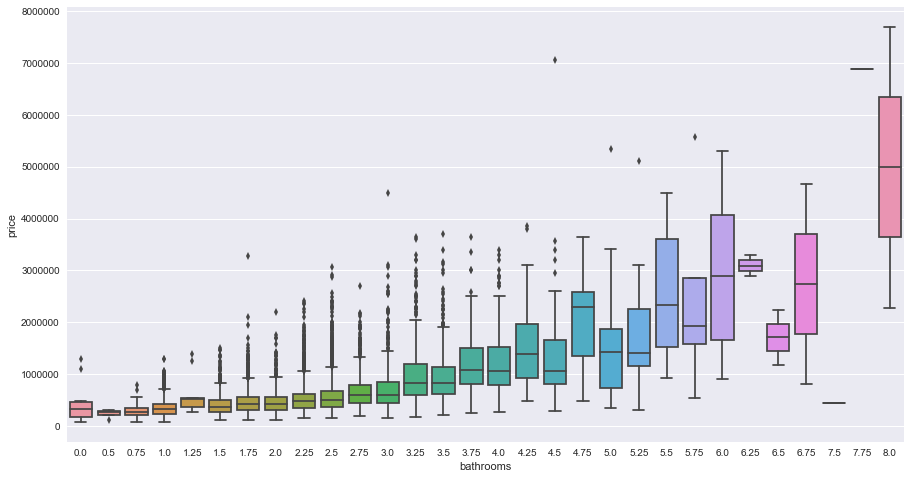

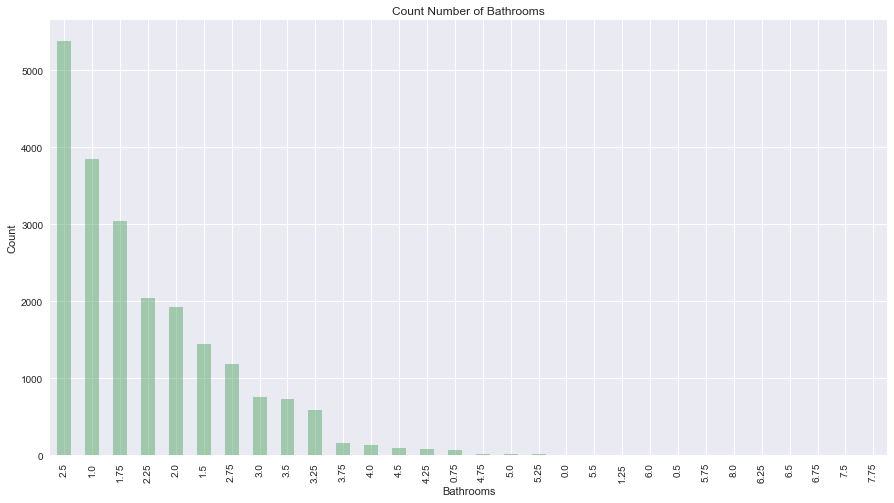

In [28]:
#Boxplot Bathroom & price
fig3 = plt.figure(figsize = (15,8))
_ = sns.boxplot(x = df.bathrooms, y = df.price)
plt.show() 

#Histogram
bathroomPrice = df['bathrooms'].value_counts().sort_values(ascending = False)
fig3 = plt.figure(figsize = (15,8))
bathroomPrice.plot(kind = 'bar', color = 'g', alpha = 0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title('Count Number of Bathrooms')
plt.show() 


In [19]:
#Print out count the bathroom
df.bathrooms.value_counts()


2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Houses with 0 bathroom are abnormal, this might be missing value or they didn't have the information about the number of bathroom the houses have.

In [31]:
df = df.loc[df['bathrooms'] != 0]